# Matplotlib의 다양한 플롯

In [4]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm ~/.cache/matplotlib -rf > /dev/null

In [ ]:
# 런타임 다시 시작

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

## 1. Bar chart

* x 데이터가 카테고리 값인 경우 사용
* bar 명령과 barh 명령으로 바 차트(bar chart) 시각화를 할 수 있다. 가로 방향으로 바 차트를 그리려면 barh 명령을 사용한다.

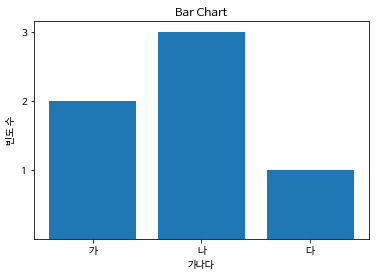

In [2]:
y = [2, 3, 1]
x = np.arange(len(y))
xlabel = ['가', '나', '다']
plt.title("Bar Chart")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()

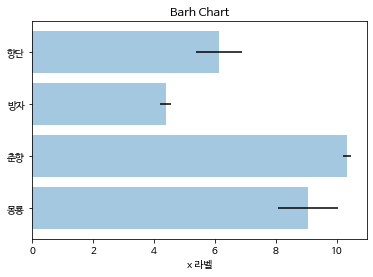

In [3]:
np.random.seed(2021)

people = ['몽룡', '춘향', '방자', '향단']
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.title("Barh Chart")
plt.barh(y_pos, performance, xerr=error, alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('x 라벨')
plt.show()

## 타이타닉 선실별 승객수

In [4]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [21]:
s = titanic['class'].value_counts()
s

Third     491
First     216
Second    184
Name: class, dtype: int64

In [22]:
df = titanic[['class','pclass']].groupby('class').count()
df

,pclass
class,
First,216
Second,184
Third,491


In [23]:
y = s.values
x = np.arange(len(y))
xlabel = s.index.to_list()

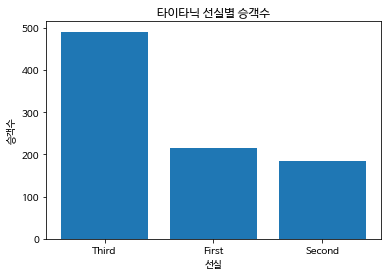

In [24]:
plt.title('타이타닉 선실별 승객수')
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.xlabel('선실')
plt.ylabel('승객수')
plt.show()

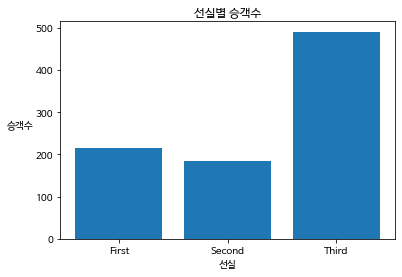

In [29]:
y = df.pclass.values
x = np.arange(len(y))
xlabel = df.index.to_list()

plt.title('선실별 승객수')
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.xlabel('선실')
plt.ylabel('승객수', rotation=0, labelpad=15)
plt.show()

## 2. 파이 차트

* 카테고리 별 값의 상대적인 비교를 해야 할 때는 pie 명령
* plt.axis('equal')

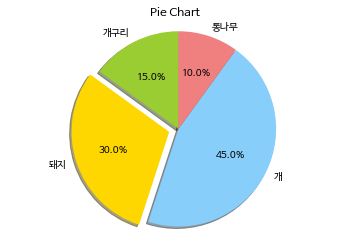

In [30]:
labels = ['개구리', '돼지', '개', '통나무']
sizes = [15, 30, 45, 10]                                            #사이즈는 합이 100이 되도록!
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)
plt.title("Pie Chart")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

## 3. 히스토그램

* 데이터의 분포를 확인하기 위함
* hist : hist 명령은 bins 인수로 데이터를 집계할 구간 정보를 받는다. 반환값으로 데이터 집계 결과를 반환한다

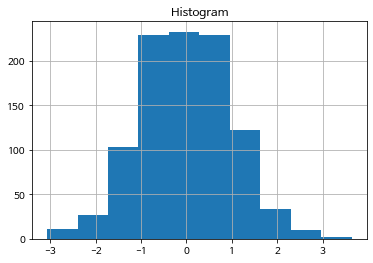

In [32]:
np.random.seed(2021)
x = np.random.randn(1000)
plt.title("Histogram")
arrays, bins, patches = plt.hist(x, bins=10)
plt.grid()
plt.show()

In [33]:
arrays

array([ 11.,  27., 103., 229., 233., 229., 122.,  34.,  10.,   2.])

In [34]:
bins

array([-3.0663246 , -2.39581956, -1.72531451, -1.05480946, -0.38430442,
        0.28620063,  0.95670567,  1.62721072,  2.29771577,  2.96822081,
        3.63872586])

## 4. 산점도(Scatter Plot)

* scatter : 2차원 데이터 즉, 두 개의 실수 데이터 집합의 상관관계

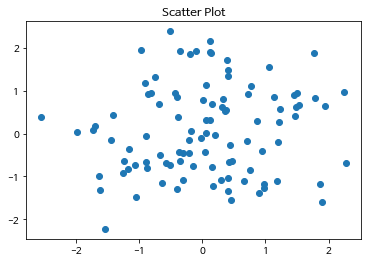

In [35]:
np.random.seed(0)
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.title("Scatter Plot")
plt.scatter(X, Y)
plt.show()

### 버블차트

* 데이터가 2차원이 아니라 3차원 혹은 4차원인 경우에는 점 하나의 크기 혹은 색깔을 이용하여 다른 데이터 값을 나타낼 수도 있다. 이런 차트를 버블 차트(bubble chart)라고 한다. 크기는 s 인수로 색깔은 c 인수로 지정한다.

#### Anscombe's Quartet

* 선형회귀선 : y = 3.0 + 0.5 * x

In [37]:
import seaborn as sns
ans = sns.load_dataset('anscombe')
ans.shape

(44, 3)

In [38]:
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [39]:
ans.groupby('dataset').describe()

x                           ...     y                          
        count mean       std  min  25%  ...   min    25%   50%   75%    max
dataset                                 ...                                
I        11.0  9.0  3.316625  4.0  6.5  ...  4.26  6.315  7.58  8.57  10.84
II       11.0  9.0  3.316625  4.0  6.5  ...  3.10  6.695  8.14  8.95   9.26
III      11.0  9.0  3.316625  4.0  6.5  ...  5.39  6.250  7.11  7.98  12.74
IV       11.0  9.0  3.316625  8.0  8.0  ...  5.25  6.170  7.04  8.19  12.50

[4 rows x 16 columns]

##### Datset I에 대해서 산점도와 회귀선 그리기

In [40]:
ds1 = ans[ans.dataset == 'I']
ds1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


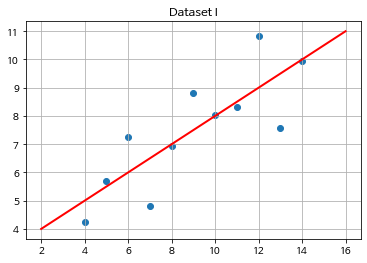

In [43]:
plt.scatter(ds1.x, ds1.y)
plt.plot([2, 16], [4, 11], c='r', lw=2)
plt.grid()
plt.title('Dataset I')
plt.show()

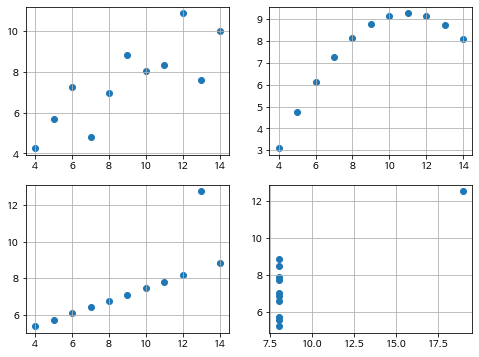

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
for i, roman in enumerate(['I', 'II', 'III', 'IV']):     #enumerate 2개의 i값. 
  ds = ans[ans.dataset == roman]
  ax = axes[i//2 , i%2]
  ax.scatter(ds.x, ds.y)
  ax.grid()

plt.show()

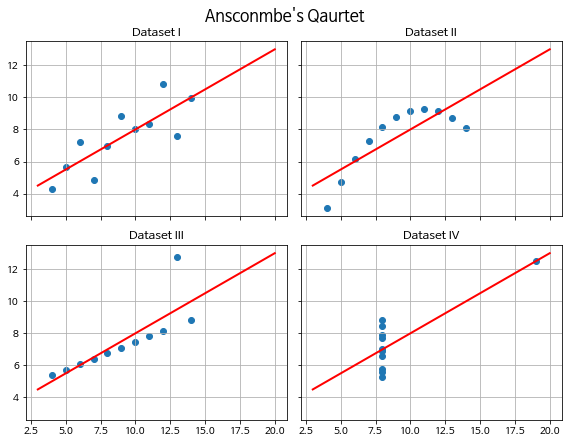

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6),
                                        sharex=True, sharey=True)
for i, roman in enumerate(['I', 'II', 'III', 'IV']):     #enumerate 2개의 i값. 
  ds = ans[ans.dataset == roman]
  ax = axes[i//2 , i%2]
  ax.scatter(ds.x, ds.y)
  ax.plot([3, 20],[4.5, 13], 'r-', lw=2)                # y = 0.5 * x + 3
  ax.set_title(f'Dataset {roman}')
  ax.grid()

fig.suptitle("Ansconmbe's Qaurtet", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 5. Imshow

* 이미지 데이터: 화상(image) 데이터처럼 행과 열을 가진 행렬 형태의 2차원 데이터는 imshow 명령을 써서 2차원 자료의 크기를 색깔로 표시

* plt.imshow(x, interpolation='', cmap=plt.cm.bone_r)

* 2차원 대이터: sklearn.datasets 

In [64]:
import matplotlib.image as img

image = img.imread('KakaoTalk_20210809_173328186.jpg')
plt.imshow(image)
plt.xticks([]); plt.yticks([])
plt.show()

FileNotFoundError: ignored

In [65]:
# sklearn
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images[0]
X


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [66]:
digits.images.shape

(1797, 8, 8)

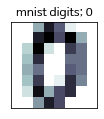

In [67]:
plt.title("mnist digits; 0")
plt.imshow(X, interpolation='nearest', cmap=plt.cm.bone_r)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplots_adjust(left=0.35, right=0.65, bottom=0.35, top=0.65)
plt.show()

## boxplot

In [68]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


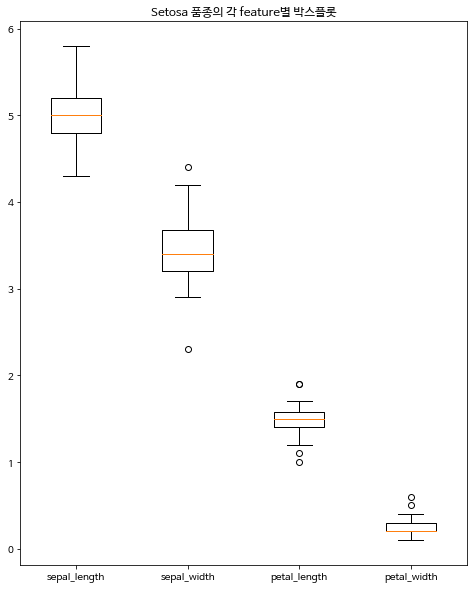

In [77]:
# setosa 품종의 각 fearue의 박스 플롯

setosa = iris[iris.species == 'setosa']
plt.figure(figsize=(8,10))
plt.boxplot([setosa.sepal_length, setosa.sepal_width,
            setosa.petal_length, setosa.petal_width],
             labels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.title('Setosa 품종의 각 feature별 박스플롯')
plt.show()

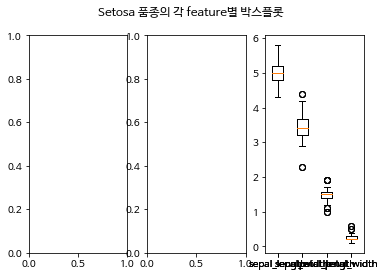

In [80]:
setosa = iris[iris.species == 'setosa']
fig, axes = plt.subplots(1, 3)

plt.boxplot([setosa.sepal_length, setosa.sepal_width,
            setosa.petal_length, setosa.petal_width],
             labels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

plt.boxplot([setosa.sepal_length, setosa.sepal_width,
            setosa.petal_length, setosa.petal_width],
             labels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

plt.boxplot([setosa.sepal_length, setosa.sepal_width,
            setosa.petal_length, setosa.petal_width],
             labels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

plt.suptitle('Setosa 품종의 각 feature별 박스플롯')
plt.show()

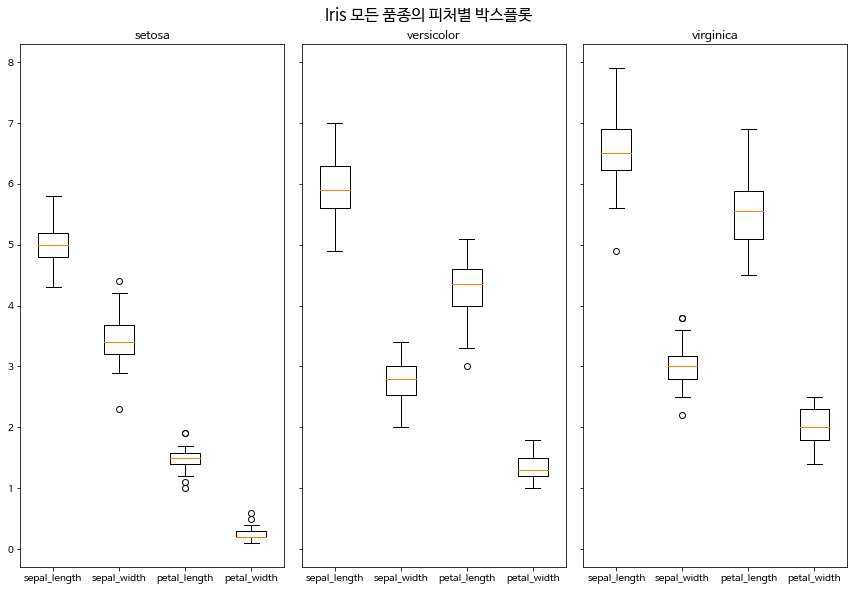

In [86]:
#모든 품종의 피처별 박스 플롯

fig, axes = plt.subplots(1, 3, figsize=(12, 8), sharey=True)

for i, species in enumerate(iris.species.unique()):     #enumerate 2개의 i값. 
  sub = iris[iris.species == species]
  ax = axes[i]
  ax.boxplot([sub.sepal_length, sub.sepal_width, sub.petal_length, sub.petal_width],
             labels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

  ax.set_title(species)


fig.suptitle("Iris 모든 품종의 피처별 박스플롯", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()